<a href="https://colab.research.google.com/github/vinods03/deep_learning/blob/main/CNN_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [3]:
base_dir = '/content/drive/MyDrive/weather'

In [4]:
import os

dataset = []
for item in os.listdir(base_dir):
  dataset.append(os.path.join(base_dir,item))

dataset

['/content/drive/MyDrive/weather/desert',
 '/content/drive/MyDrive/weather/cloudy',
 '/content/drive/MyDrive/weather/green_area',
 '/content/drive/MyDrive/weather/water']

In [5]:
# convert one image into array

from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/drive/MyDrive/weather/desert/desert(4).jpg')
img = img_to_array(img)
img = img/255
print(img.shape)
# img

(256, 256, 3)


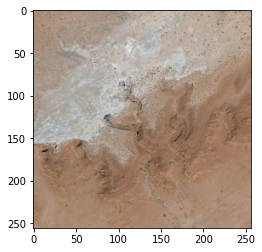

In [6]:
# convert array back to image

import matplotlib.pyplot as plt
plt.imshow(img)

In [7]:
# encoding the labels

translate = {'water':0, 'desert':1, 'green_area':2, 'cloudy':3}
reverse_translate = {0:'water', 1:'desert', 2:'green_area', 3:'cloudy'}

In [8]:
image_array = []
image_label = []

for i in range(0, len(dataset)):
  for j in os.listdir(dataset[i]):
    img_path = os.path.join(dataset[i],j)
    img = load_img(img_path, target_size = (256,256))
    img = img_to_array(img)
    img = img/255
    image_array.append(img)
    label = dataset[i].split('/')[-1]
    image_label.append(translate[label])


In [9]:
import numpy as np
image_array = np.array(image_array)
image_label = np.array(image_label)

In [10]:
print(image_array.shape)

(5631, 256, 256, 3)


In [11]:
print(image_label.shape)

(5631,)


In [12]:
c = len(set(image_label))
print('the number of unique classes is:', c)

the number of unique classes is: 4


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_array, image_label, test_size = 0.2)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4504, 256, 256, 3)
(1127, 256, 256, 3)
(4504,)
(1127,)


In [15]:
# build the model

from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Flatten, GlobalMaxPooling2D, Dense, Dropout
from tensorflow.keras.models import Model

In [16]:
X_train[0].shape

i = Input(shape = X_train[0].shape)

x = Conv2D(32, (3,3), strides = 2, activation = 'relu', padding = 'same')(i)
x = BatchNormalization()(x)

x = Conv2D(64, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)

x = Conv2D(128, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)

x = Conv2D(256, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)

# x = Conv2D(256, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
# x = BatchNormalization()(x)

# x = Flatten()(x)
x = GlobalMaxPooling2D()(x)

x = Dropout(0.2)(x)
x = Dense(256, activation = 'relu')(x)

x = Dropout(0.2)(x)
x = Dense(c, activation = 'softmax')(x)

m = Model(i,x)

In [17]:
# compile and fit the model

m.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
r = m.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20)

Epoch 1/20
141/141 [==============================] - 19s 42ms/step - loss: 0.4346 - accuracy: 0.8415 - val_loss: 1.9353 - val_accuracy: 0.2857
Epoch 2/20
141/141 [==============================] - 5s 35ms/step - loss: 0.2686 - accuracy: 0.8968 - val_loss: 2.5551 - val_accuracy: 0.4161
Epoch 3/20
141/141 [==============================] - 5s 35ms/step - loss: 0.2556 - accuracy: 0.9041 - val_loss: 1.4633 - val_accuracy: 0.6495
Epoch 4/20
141/141 [==============================] - 5s 35ms/step - loss: 0.2349 - accuracy: 0.9054 - val_loss: 0.6357 - val_accuracy: 0.7267
Epoch 5/20
141/141 [==============================] - 5s 35ms/step - loss: 0.1873 - accuracy: 0.9281 - val_loss: 0.3558 - val_accuracy: 0.9024
Epoch 6/20
141/141 [==============================] - 5s 35ms/step - loss: 0.1820 - accuracy: 0.9298 - val_loss: 0.1065 - val_accuracy: 0.9654
Epoch 7/20
141/141 [==============================] - 5s 35ms/step - loss: 0.1591 - accuracy: 0.9418 - val_loss: 0.0825 - val_accuracy: 0.976

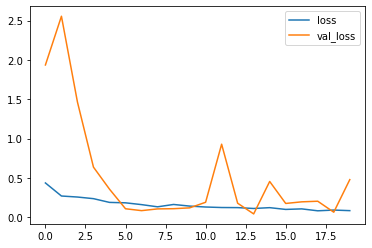

In [18]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

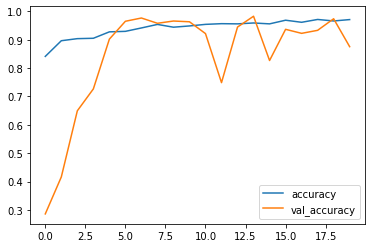

In [19]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [20]:
y_test_pred = m.predict(X_test)

In [21]:
y_test_pred_decoded = []
for i in range(0, len(y_test_pred)):
  y_test_pred_decoded.append(y_test_pred[i].argmax())

# y_test_pred_decoded

In [22]:
import sklearn.metrics as metrics
accuracy = metrics.accuracy_score(y_test, y_test_pred_decoded)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_test_pred_decoded, average = 'weighted')
recall = metrics.recall_score(y_test, y_test_pred_decoded, average = 'weighted')
f1 = metrics.f1_score(y_test, y_test_pred_decoded, average = 'weighted')
cm = metrics.confusion_matrix(y_test, y_test_pred_decoded)

print('accuracy:', accuracy)
print('error:', error)
print('precision:', precision)
print('recall:', recall)
print('f1:', f1)
print('\n')
print('The confusion matrix is:')
print(cm)

print('\n')
print('Classification report:')
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_decoded))

accuracy: 0.8757763975155279
error: 0.12422360248447206
precision: 0.8932231655211833
recall: 0.8757763975155279
f1: 0.8710258332509258


The confusion matrix is:
[[273   0   7   0]
 [  0 130   0  92]
 [ 19   0 284   0]
 [ 21   1   0 300]]


Classification report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       280
           1       0.99      0.59      0.74       222
           2       0.98      0.94      0.96       303
           3       0.77      0.93      0.84       322

    accuracy                           0.88      1127
   macro avg       0.90      0.86      0.86      1127
weighted avg       0.89      0.88      0.87      1127



The image is predicted to be: water


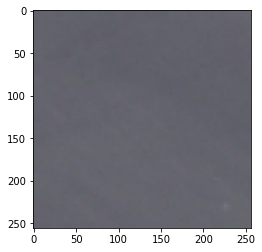

In [23]:
# Lets predict for 1 image and chk

img = load_img('/content/drive/MyDrive/weather/water/SeaLake_7.jpg', target_size = (256, 256))
img = img_to_array(img)
img = img/255
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
# img

prediction_proba = m.predict(img)
prediction = prediction_proba.argmax()
print('The image is predicted to be:', reverse_translate[prediction])